<a href="https://colab.research.google.com/github/carlosfmorenog/CMM536/blob/master/CMM536_Topic_7/CMM536_T7_Lab_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMM536 Topic 7 Laboratory (Solved)

In this activity, you will implement an NN by coding the basic necessary steps.

## Preparing Some Building Blocks

### Building the sigmoid function

There are two options to do exponent in Python: `np.exp()` and `math.exp()` You will use the second one, although the first one is more useful in "real life". **Do you know why?**

Mostly, because usually you import `numpy` rather than `math`! However, there's a second reason that you will see below.

Remember that $sigmoid(x) = \frac{1}{1+e^{-x}}$ is also known as the logistic function.

In [ ]:
## Use this cell to define the sigmoid function
import math
def basic_sigmoid(z):
    """
    Compute sigmoid of z

    Input:
    z: A number

    Output:
    s: sigmoid(z)
    """

    ### START CODE HERE ### (1 line of code)
    s = 1/(1+math.exp(-z))
    ### END CODE HERE ###

    return s

Now in the following cell run the sigmoid function for $z=3$

In [ ]:
basic_sigmoid(3)

0.9525741268224334

You should obtain 0.9525741268224334.

Actually, we rarely use the `math` library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors. This is why numpy is more useful.

In [ ]:
## One reason why we use "numpy" instead of "math" in Deep Learning
x = [1, 2, 3]
basic_sigmoid(x) # you will see this give an error when you run it, because x is a vector.

TypeError: bad operand type for unary -: 'list'

In fact, if $ x = (x_1, x_2, ..., x_n)$ is a row vector, then $np.exp(x)$ will apply the exponential function to every element of x. The output will thus be: $np.exp(x) = (e^{x_1}, e^{x_2}, ..., e^{x_n})$

In [ ]:
import numpy as np
# example of np.exp
x = np.array([1, 2, 3])
print(np.exp(x)) # result is (exp(1), exp(2), exp(3))

[ 2.71828183  7.3890561  20.08553692]


Furthermore, if x is a vector, then a Python operation such as $s = x + 3$ or $s = \frac{1}{x}$ will output s as a vector of the same size as x.

Now you will implement the sigmoid function using `numpy`.

`x` could now be either a real number, a vector, or a matrix. In case it is a vector, it will look as follows:
$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}$$

In [ ]:
## Use this cell to implement the "vectorised" version of the sigmoid function
def sigmoid(z):
    """
    Compute the sigmoid of number/vector/matrix z

    Input:
    z: A number or numpy array

    Output:
    s: sigmoid(z)
    """

    ### START CODE HERE ### (1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###

    return s

Now input the numpy array `[1,2,3]` to your function and print the result

In [ ]:
x = np.array([1, 2, 3])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

**Expected Output**: array([ 0.73105858,  0.88079708,  0.95257413])

### Sigmoid Gradient

As you've seen in the lecture, you will need to compute gradients to optimise the calculation of the loss function, which will be the one that perform backpropagation to calculate the correct weights and biases.

**Exercise**: Implement a function called `sigmoid_grad()` to compute the gradient of the sigmoid function with respect to its input z.

The formula is: $$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))$$

**Hint**: You need to code this function in two steps:
1. Set s to be the sigmoid of z. You might find your sigmoid(z) function useful.
2. Compute $\sigma(x) = s(1-s)$

In [ ]:
## Use this cell to define the sigmoid_derivative function

def sigmoid_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input z.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.

    Arguments:
    z: A number or numpy array

    Return:
    ds: Your computed gradient.
    """

    ### START CODE HERE ### (2 lines of code)
    s = sigmoid(x)
    ds = s*(1-s)
    ### END CODE HERE ###

    return ds

Now test your function with the same numpy array value as before. You should now get different values!

In [ ]:
x = np.array([1, 2, 3])
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = [0.19661193 0.10499359 0.04517666]


**Expected Output**: np.array([ 0.19661193  0.10499359  0.04517666])

### Normalising numpy arrays with numpy

Now we will design a normalisation function which is fitted for purpose and that is capable of normalising **all** your numpy array per row effectively.

In [ ]:
## Use this cell to implement a function that normalises a numpy array by row
def normaliseRows(x):
    """
    Implement a function that normalises each row of the matrix x (to have unit length).

    Argument:
    x: A numpy matrix of shape (n, m)

    Returns:
    x: The normalised numpy matrix by row.
    """

    ### START CODE HERE ### (2 lines of code)
    # Compute x_n as the norm 2 of x. Use np.linalg.norm(..., ord = 2, axis = ..., keepdims = True)
    x_norm = np.linalg.norm(x, ord = 2, axis = 1, keepdims = True)
    # Divide x by its norm.
    x = x/x_norm
    ### END CODE HERE ###

    return x

No test your function using a `numpy array` with two vectors inside: [1,2,3] and [4,5,6]

In [ ]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6]])
print("normaliseRows(x) = " + str(normaliseRows(x)))

normaliseRows(x) = [[0.26726124 0.53452248 0.80178373]
 [0.45584231 0.56980288 0.68376346]]


**Expected Output**: [[0.26726124 0.53452248 0.80178373],[0.45584231 0.56980288 0.68376346]]

## Loading the Dataset

### Importing the Necessary Packages

- matplotlib
- PIL
- scipy
- [h5py](http://www.h5py.org): A common package to interact with a dataset that is stored on an H5 file.
- `load_dataset()` function (contained in the next cell): It contains a command to download the dataset easily.

In [ ]:
## Use this cell to upload the .h5 files
from google.colab import files
uploaded = files.upload()

Saving test_catvnoncat.h5 to test_catvnoncat.h5
Saving train_catvnoncat.h5 to train_catvnoncat.h5


In [ ]:
import numpy as np
import h5py

def load_dataset():
    train_dataset = h5py.File('/content/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

# use this line to show plots in the first run of the notebook
%matplotlib inline

### Image loading and preprocessing

**Problem Statement**: You are given a dataset `data.h5` containing:
    - a training set of m_train images labelled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

**Before running the command, download `train_catvnoncat.h5` and `test_catvnoncat.h5` and upload them to Google Colab using the following cell.**

In [ ]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added the suffix `orig` at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with `train_set_x` and `test_set_x` (the targets `train_set_y` and `test_set_y` don't need any preprocessing).

Each line of your `train_set_x_orig` and `test_set_x_orig` is an array representing an image. You can visualise an example by running the following code. Feel free also to change the `index` value and re-run to see other images.

y = [0], it's a 'non-cat' picture.


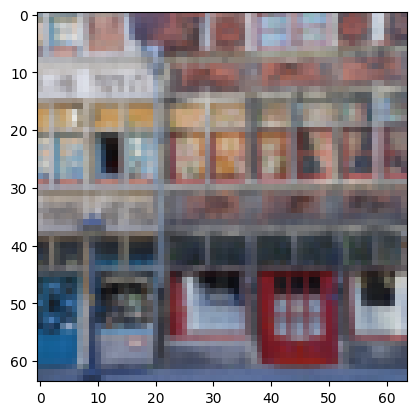

In [ ]:
# Example of a picture
index = 206
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

As you train more models, you will see that the majority of deep learning errors/bugs come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [ ]:
## Use this cell to find the dimension of your data

### START CODE HERE ### (3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Expected Output**:

    m_train= 209
    m_test = 50
    num_px=  64

**Exercise:** Reshape the training and test sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

**Hint**: Instead of using the `np.flatten()` function, try to use the `np.reshape()` function and then transpose the result, for instance, `X_flatten = X.reshape(X.shape[0], -1).T`

In [ ]:
## Use this cell to reshape the training and test examples

### START CODE HERE ### (2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Expected Output**:

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td>
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td>
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td>
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td>
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td>
  </tr>
</table>

Then, normalise the dataset as we have seen in previous lectures/labs:

In [ ]:
## Use this cell to normalise the training and test examples

### START CODE HERE ### (2 lines of code)
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
### END CODE HERE ###

## General Architecture of the Learning Algorithm

Now, you will build a Logistic Regression, using a Neural Network mindset. In fact, **Logistic Regression is actually a very simple Neural Network!**

**Keep in mind the mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

**Key steps**:

In this exercise, you will carry out the following steps:
    - Initialise the parameters of the model
    - Learn the parameters for the model by minimising the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

### Initialising parameters

**Exercise:** Implement parameter initialisation in the cell below. You have to initialise `w` as a vector of zeros and `b` as zero. If you don't know what numpy function to use, look up `np.zeros()`.

In [ ]:
## Use this cell to build a function that initialises the weights and bias as a vector of zeros

def initialise_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initialises b to 0.

    Input:
    dim: size of the w vector we want (or number of parameters in this case)

    Output:
    w: vector of shape (dim, 1)
    b: zero
    """

    ### START CODE HERE ### (2 lines of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

Now, run your function with `dim=2`.

In [ ]:
dim = 2
w, b = initialise_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**: w=[[0.][0.]], b =0

### Forward and Backward Propagation

Now that your parameters are initialised, you can do the "forward" and "backward" propagation steps for learning the parameters.

Here are the two formulas you will be using:


$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- Compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

In [ ]:
## Use this cell to define your propagate function

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Inputs:
    w: weights, a numpy array of size (num_px * num_px * 3, 1)
    b: bias, a scalar
    X: data of size (num_px * num_px * 3, number of examples)
    Y: true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Outputs:
    cost: Negative log-likelihood cost for logistic regression
    dw: Gradient of the loss with respect to w, thus same shape as w
    db: Gradient of the loss with respect to b, thus same shape as b
    ** These two last values will be put into a dictionary called grads

    Tips: Write your code step by step for the propagation, use functions np.log() and np.dot()
    """

    m = X.shape[1] # this gives you the number of samples

    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (2 lines of code)
    # compute sigmoid function
    A = sigmoid(np.dot(w.T,X)+b)
    # compute cost
    cost = (- 1/m) * np.sum(Y*np.log(A) + (1-Y) * (np.log(1-A)))
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (2 lines of code)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    # Finally, store dw and db in a dictionary called grads
    grads = {"dw": dw,
             "db": db}

    return grads, cost

Let's test the function!

In [ ]:
w = np.array([[1.],[2.]])
b = 2.0
X =  np.array([[1.,2.,-1.],[3.,4.,-3.2]])
Y = np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
      <td> [[ 0.99845601]
     [ 2.39507239]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.00145557813678 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 5.801545319394553 </td>
    </tr>

</table>

### Optimisation

- You have initialised your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

There is an additional step that we can use called optimisation. Its goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [ ]:
## Optimisation function

def optimise(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimises w and b by running a gradient descent algorithm

    Inputs:
    w: Weights
    b: Bias
    X: Flattened/Normalised dataset
    Y: Target
    num_iterations: Number of iterations of the optimization loop
    learning_rate: Learning rate of the gradient descent update rule
    print_cost: A flag value, if TRUE iy prints the loss every 100 steps

    Outputs:
    params: Dictionary containing weights and bias
    grads: dw and db
    costs: List of all the costs computed during the optimisation, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    # Start with an empty costs list
    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation (1 line of code)
        ### START CODE HERE ###
        grads, cost = propagate(w,b,X,Y)
        ### END CODE HERE ###

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (2 lines of code)
        ### START CODE HERE ###
        w = w-learning_rate*dw
        b = b-learning_rate*db
        ### END CODE HERE ###

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

Run the function to see how it works!

In [ ]:
params, grads, costs = optimise(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


**Expected Output**:

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067652


### Prediction

The previous function will output the learned $w$ and $b$. We are able to use these values to predict the labels for a dataset $X$.

Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop, although there is also a way to vectorise this).

In [ ]:
## Use this cell to implement the predict function

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Inputs:
    w
    b
    X

    Output:
    Y_prediction: A numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (1 line of code)
    A = sigmoid(np.dot(w.T, X)+b)
    ### END CODE HERE ###

    ## The non-vectorised way

    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (4 lines of code)
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        ### END CODE HERE ###

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

Now run the function with some artificial data:

In [ ]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


**Expected Output**: [[ 1.  1.  0.]]


## Merge all functions into a model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [ ]:
## Use this cell to build the whole odel into a function

def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Input:
    X_train: Training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train: Training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test: Test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test: Test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations: Hyperparameter representing the number of iterations to optimize the parameters
    learning_rate: Hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost: Set to true to print the cost every 100 iterations

    Output:
    d: Dictionary containing information about the model.
    """

    ### START CODE HERE ###

    # initialise parameters with zeros (1 line of code)
    w, b = initialise_with_zeros(X_train.shape[0])

    # Optimised gradient descent (1 line of code)
    parameters, grads, costs = optimise(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict BOTH the train and the test set examples (2 lines of code)
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    # Create the dictionary with the results
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Run the following cell to train your model.

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


You should get a series of cost values printed, and in the end the accuracy of classifying the training and the test data!

Notice the following:
1. Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data.
2. Test error is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, we'll build a better classifier next week!
3. Notice that the model is clearly `overfitting` the training data. **Do you have any idea(s) to reduce overfitting?**

Answer: Change parameters (i.e. learning rate), do cross-validation, etc...

Let's plot the cost function and the gradients to understand a little bit more our NN:

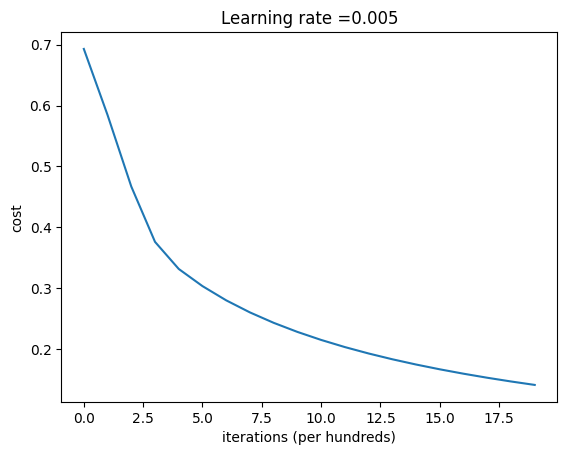

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

You can see the cost **decreasing**. This shows that the parameters are being learned, however, you will see that you could train the model even more of the training set. If you increase the number of iterations `num_iterations=5000`, you might see that the training set accuracy goes up, but the test set accuracy goes down. This means that your model is overfitting even more!

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Cost after iteration 2000: 0.135608
Cost after iteration 2100: 0.130708
Cost after iteration 2200: 0.126137
Cost after iteration 2300: 0.121861
Cost after iteration 2400: 0.117855
Cost after iteration 2500: 0.114093
Cost after iteration 2600: 0.110554
Cost after iteration 2700: 0.107219
Cost

## Further analysis

Let's analyse the NN further, and examine possible choices for the learning rate $\alpha$.

### Choosing the learning rate

In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialised the `learning_rates` variable to contain, and see what happens.

learning rate: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



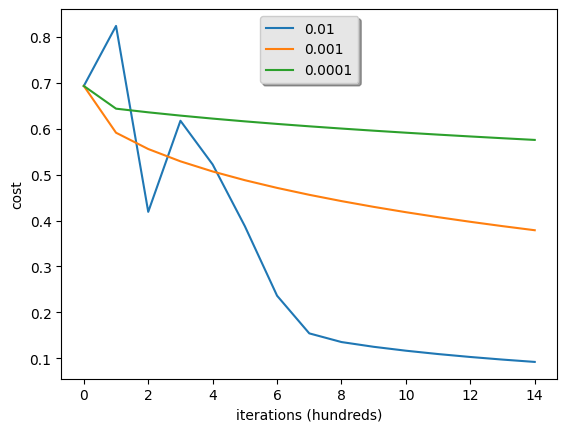

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**:
- Different learning rates give different costs and thus different prediction results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost).
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, it is recommended to:
    - Choose the learning rate that better minimises the cost function.
    - If your model overfits, use other techniques to reduce overfitting.

## Testing your own images in the NN

You can use your own images and see the output of the model. To do that:
   1. Load the image into the notebook
   2. Import it as a numpy array using OpenCV
   3. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)

In [ ]:
## Use this cell to load the image to be tested
from google.colab import files
uploaded = files.upload()

Saving logo.png to logo.png


In [ ]:
image_name='/content/logo.png'

y = 1.0, your algorithm predicts that this is a "cat" picture


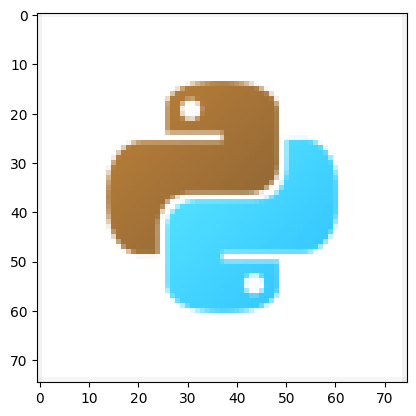

In [ ]:
# import open cv
import cv2

# Preprocessing the image to fit into the algorithm.
img = cv2.imread(image_name)
plt.imshow(img)
res = np.resize(img,(num_px,num_px,3))
flattrans = res.reshape((1, num_px*num_px*3)).T

# Predict the label
my_predicted_image = predict(d["w"], d["b"], flattrans)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts that this is a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture")

Apparently Pythons look like cats...

In [ ]:
## Use this cell to load the image to be tested
from google.colab import files
uploaded = files.upload()

Saving stadium.jpg to stadium.jpg


In [ ]:
image_name='/content/stadium.jpg'

y = 0.0, your algorithm predicts that this is a "non-cat" picture


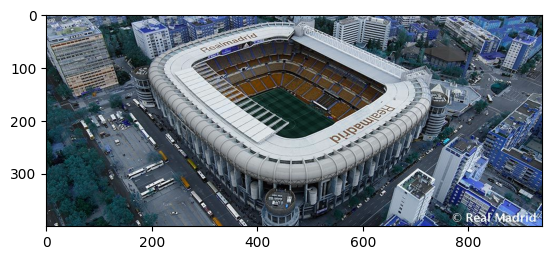

In [ ]:
# import open cv
import cv2

# Preprocessing the image to fit into the algorithm.
img = cv2.imread(image_name)
plt.imshow(img)
res = np.resize(img,(num_px,num_px,3))
flattrans = res.reshape((1, num_px*num_px*3)).T

# Predict the label
my_predicted_image = predict(d["w"], d["b"], flattrans)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts that this is a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture")

...but stadiums don't look like cats!

## Bonus

    - Play with the learning rate and the number of iterations
    - Try different w/b initialisation methods and compare the results
    - Test other image preprocessing techniques (center the data, or divide each row by its standard deviation)

## Bibliography

- [Deep Learning Specialization by Andrew NG (Coursera)](https://es.coursera.org/specializations/deep-learning)
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c